In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test=pd.read_csv('test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print('Gender Mode: ',df['Gender'].mode())
print('Married mode: ',df['Married'].mode())
print('Self_Employed',df['Self_Employed'].mode())
print('Credit_History',df['Credit_History'].mode())

Gender Mode:  0    Male
Name: Gender, dtype: object
Married mode:  0    Yes
Name: Married, dtype: object
Self_Employed 0    No
Name: Self_Employed, dtype: object
Credit_History 0    1.0
Name: Credit_History, dtype: float64


In [6]:
df[['Loan_Amount_Term','LoanAmount']][df['Loan_Amount_Term'].isnull()]

,Loan_Amount_Term,LoanAmount
19,NaN,115.0
36,NaN,100.0
44,NaN,96.0
45,NaN,88.0
73,NaN,95.0
112,NaN,152.0
165,NaN,182.0
197,NaN,120.0
223,NaN,175.0
232,NaN,120.0


In [7]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
df['Dependents'].replace('3+',3,inplace=True)
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [9]:
df[['Dependents','Married']][df['Dependents'].isnull()]

,Dependents,Married
102,NaN,Yes
104,NaN,NaN
120,NaN,Yes
226,NaN,Yes
228,NaN,NaN
293,NaN,No
301,NaN,Yes
332,NaN,No
335,NaN,Yes
346,NaN,Yes


In [10]:
df['Gender'].fillna('Male',inplace=True)#replacing with mode
df['Married'].fillna('Yes',inplace=True)#replacing with mode
df['Self_Employed'].fillna('No',inplace=True)#replacing with mode
df['LoanAmount'].fillna((df['LoanAmount'].mean()),inplace=True)#replacing with mean
df['Loan_Amount_Term'].fillna(84,inplace=True)#replacing with suitable option after visual analysis
df['Credit_History'].fillna(1.0,inplace=True)#replacing with mode
df['Dependents'].fillna(0,inplace=True)#replacing with mode

In [11]:
df['Dependents']=df['Dependents'].astype('int')
df['Dependents'].dtype

dtype('int32')

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.drop('Loan_ID',axis=1,inplace=True)

In [14]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [15]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,336.117264,0.855049
std,1.009623,6109.041673,2926.248369,84.037468,75.029168,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [16]:
obj_col=df.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[obj_col]=oe.fit_transform(df[obj_col])
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0


In [18]:
data=df

In [19]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,336.117264,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,75.029168,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df.iloc[:,:-1]=ss.fit_transform(df.iloc[:,:-1])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.318572,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.318572,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.318572,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.318572,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.318572,0.411733,1.223298,1.0


In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.318572,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.318572,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.318572,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.318572,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.318572,0.411733,1.223298


In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=4,test_size=0.25,stratify=y)

In [23]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    train_accuracy=model.score(xtrain,ytrain)
    test_accuracy=model.score(xtest,ytest)
    print(str(model)[:-2],'Accuracy')
    print('Accuracy:',accuracy_score(ytest,ypred),"\nClassification Report:\n",classification_report(ytest,ypred), \
          '\nConfusion Matrix: \n', confusion_matrix(ytest,ypred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy :{test_accuracy}')
    print()
    print()
    return model

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
knn=mymodel(KNeighborsClassifier())
svc=mymodel(SVC())
dt=mymodel(DecisionTreeClassifier())

KNeighborsClassifier Accuracy
Accuracy: 0.8311688311688312 
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.54      0.67        48
         1.0       0.82      0.96      0.89       106

    accuracy                           0.83       154
   macro avg       0.84      0.75      0.78       154
weighted avg       0.84      0.83      0.82       154
 
Confusion Matrix: 
 [[ 26  22]
 [  4 102]]
Training Accuracy: 0.8130434782608695
Testing Accuracy :0.8311688311688312


SVC Accuracy
Accuracy: 0.8246753246753247 
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.44      0.61        48
         1.0       0.80      1.00      0.89       106

    accuracy                           0.82       154
   macro avg       0.90      0.72      0.75       154
weighted avg       0.86      0.82      0.80       154
 
Confusion Matrix: 
 [[ 21  27]
 [  0 106]]
Training Accuracy: 0.808695652

In [25]:
tr=[]
te=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    
    tr.append(train)
    te.append(test) 

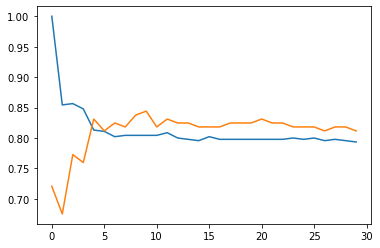

In [27]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(te)

In [28]:
knn=mymodel(KNeighborsClassifier(n_neighbors=5))

KNeighborsClassifier Accuracy
Accuracy: 0.8311688311688312 
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.54      0.67        48
         1.0       0.82      0.96      0.89       106

    accuracy                           0.83       154
   macro avg       0.84      0.75      0.78       154
weighted avg       0.84      0.83      0.82       154
 
Confusion Matrix: 
 [[ 26  22]
 [  4 102]]
Training Accuracy: 0.8130434782608695
Testing Accuracy :0.8311688311688312


